# Nombre y Matricula
### Alejandro Moncada Espinosa - A01638343

# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [1]:
# Import the packages that we will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [3]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = "../../NotebooksProfessor/"

In [4]:
# url string that hosts our .csv file
url = "cartwheel.csv"

# Read the .csv file and store it as a pandas Data Frame
df = pd.read_csv(Ruta + url)



# Exploring the content of the data set

Get a general 'feel' of the data


In [5]:
df.head()

,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56.0,F,1,Y,1,62.0,61.0,79,Y,1.0,7
1,2,26.0,F,1,Y,1,62.0,60.0,70,Y,1.0,8
2,3,33.0,F,1,Y,1,66.0,64.0,85,Y,1.0,7
3,4,39.0,F,1,N,0,64.0,63.0,87,Y,1.0,10
4,5,27.0,M,2,N,0,73.0,75.0,72,N,0.0,4


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [9]:
# Number of times that each distinct value of a variable occurs in a data set
df["Age"].value_counts()

Age
26.0    7
27.0    7
24.0    5
28.0    5
23.0    5
25.0    4
30.0    4
33.0    3
39.0    2
38.0    2
29.0    2
31.0    2
56.0    1
22.0    1
32.0    1
Name: count, dtype: int64

In [10]:
# Proportion of each distinct value of a variable occurs in a data set
df["Age"].value_counts(normalize=True)

Age
26.0    0.137255
27.0    0.137255
24.0    0.098039
28.0    0.098039
23.0    0.098039
25.0    0.078431
30.0    0.078431
33.0    0.058824
39.0    0.039216
38.0    0.039216
29.0    0.039216
31.0    0.039216
56.0    0.019608
22.0    0.019608
32.0    0.019608
Name: proportion, dtype: float64

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [13]:
# Total number of observations
df["Age"].value_counts().sum()


# total number of null observations in Age
df["Age"].isnull().sum()


# Total number of counts in Age (excluding missing values)
df["Age"].value_counts().sum() - df["Age"].isnull().sum()



np.int64(50)

# Histogram

It is often good to get a feel for the shape of the distribution of the data.

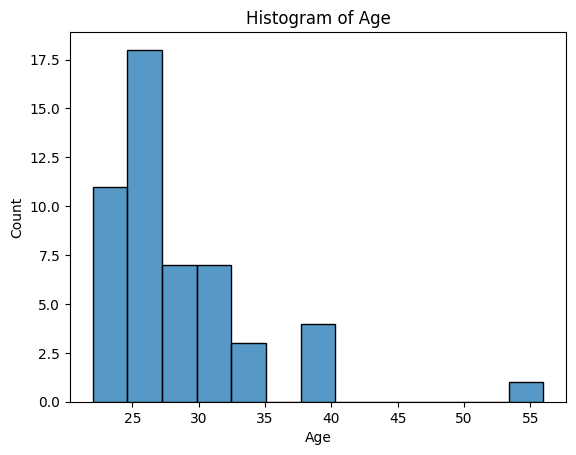

In [17]:
# Plot histogram of Age
sns.histplot(df["Age"].dropna(), kde = False).set_title("Histogram of Age")
plt.show()

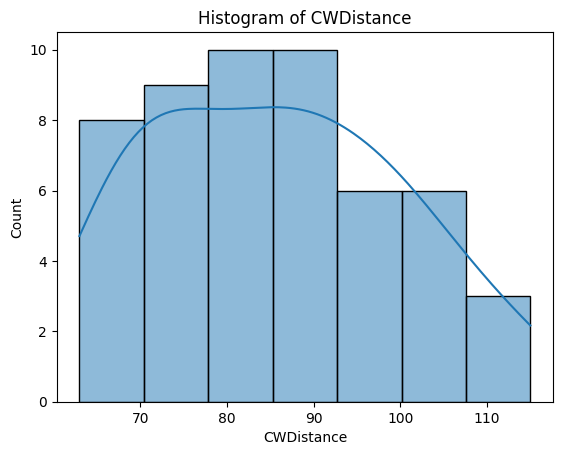

In [18]:
# Plot distribution of CWDistance
sns.histplot(df["CWDistance"], kde = True).set_title("Histogram of CWDistance")
plt.show()

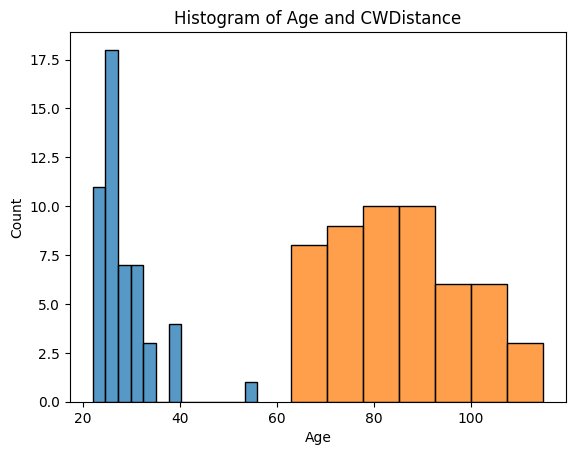

In [20]:
# Plot histogram of both the Age and the Wingspan
sns.histplot(df["Age"])
sns.histplot(df["CWDistance"]).set_title("Histogram of Age and CWDistance")
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

NameError: name 'df' is not defined

# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

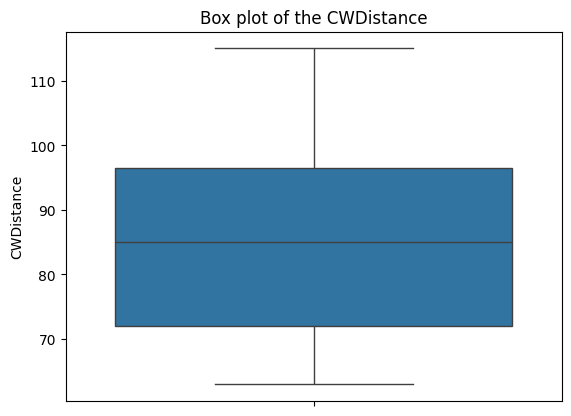

In [21]:
# Create the boxplot of the "CWDistance"
sns.boxplot(df["CWDistance"]).set_title("Box plot of the CWDistance")
plt.show()

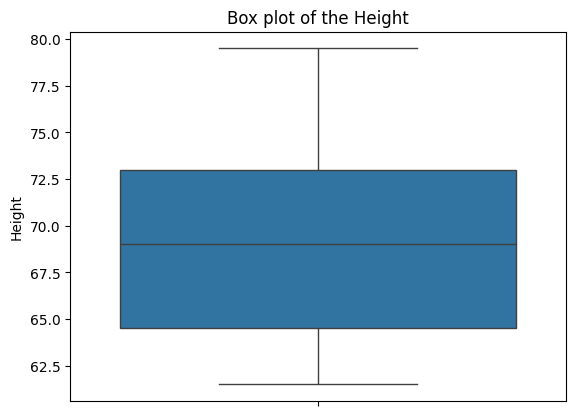

In [22]:
# Create the boxplot of the "Height"
sns.boxplot(df["Height"]).set_title("Box plot of the Height")
plt.show()

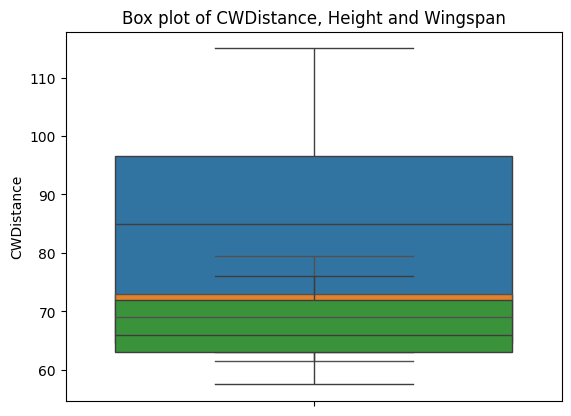

In [23]:
# Create the boxplots of the "CWDistance", "Height" and "Wingspan"
sns.boxplot(df["CWDistance"])
sns.boxplot(df["Height"])
sns.boxplot(df["Wingspan"]).set_title("Box plot of CWDistance, Height and Wingspan")
plt.show()

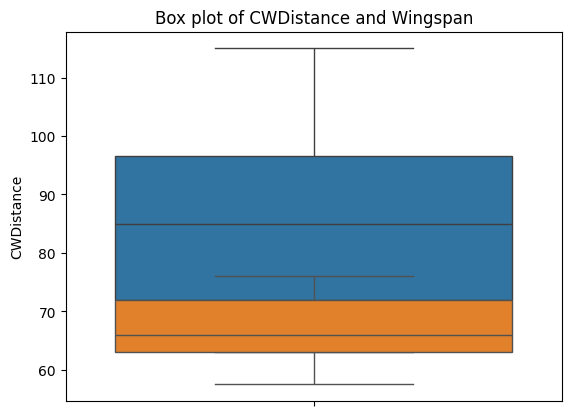

In [24]:
# Create the boxplots of the "CWDistance" and of the "Wingspan"
sns.boxplot(df["CWDistance"])
sns.boxplot(df["Wingspan"]).set_title("Box plot of CWDistance and Wingspan")
plt.show()

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

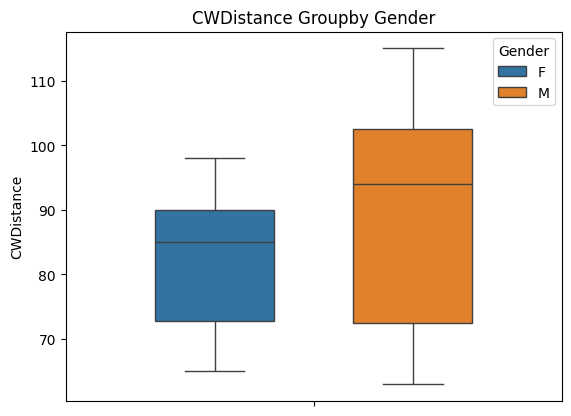

In [31]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
sns.boxplot(data=df, y='CWDistance', hue='Gender', gap=.4).set_title("CWDistance Groupby Gender")
plt.show()

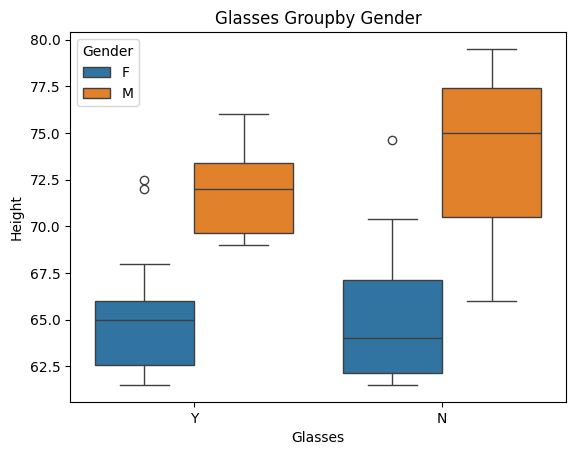

In [ ]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
sns.boxplot(data=df, x="Glasses", y="Height", hue="Gender").set_title("Glasses Groupby Gender")
plt.show()

# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


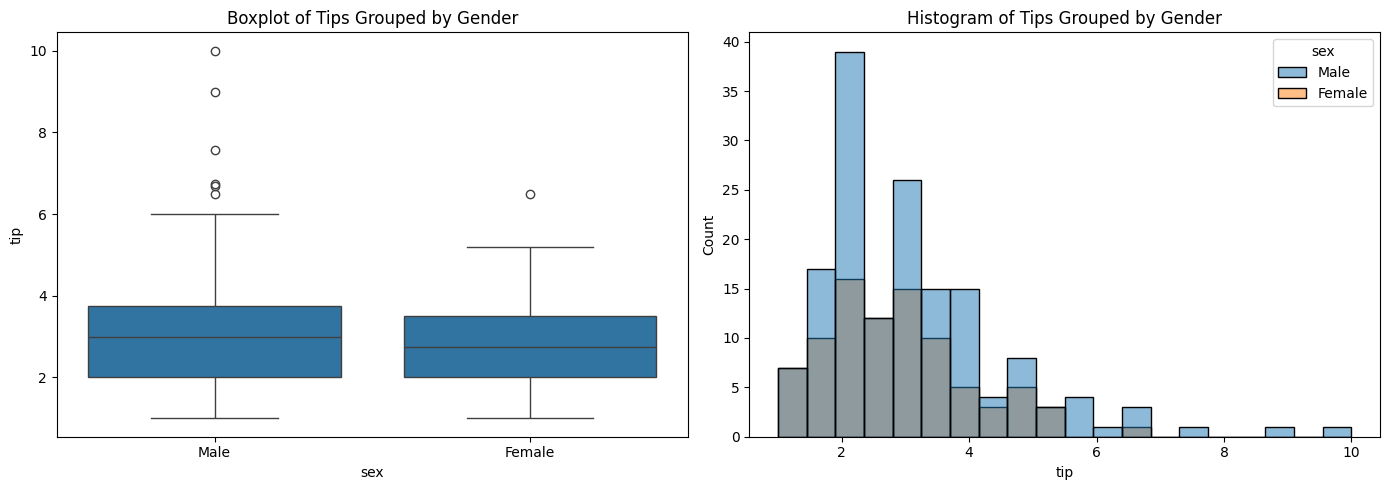

In [40]:
# Create a boxplot and histogram of the "tips" grouped by "Gender"
df = sns.load_dataset("tips") 

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df, x="sex", y="tip", ax=axes[0])
axes[0].set_title("Boxplot of Tips Grouped by Gender")

sns.histplot(data=df, x="tip", hue="sex", bins=20, ax=axes[1])
axes[1].set_title("Histogram of Tips Grouped by Gender")

plt.tight_layout()
plt.show()

# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

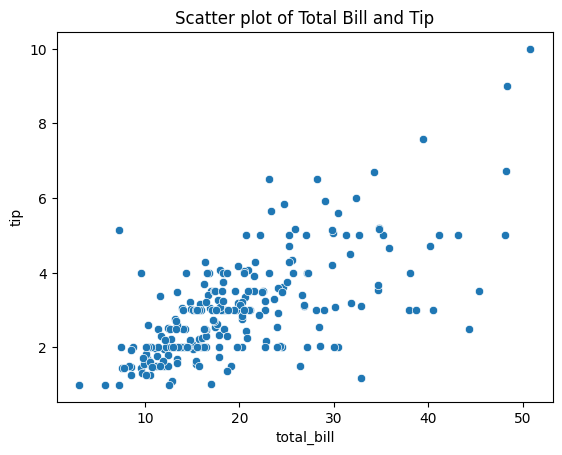

In [41]:
# scatter plot between two variables
sns.scatterplot(data=df, x="total_bill", y="tip").set_title("Scatter plot of Total Bill and Tip")
plt.show()

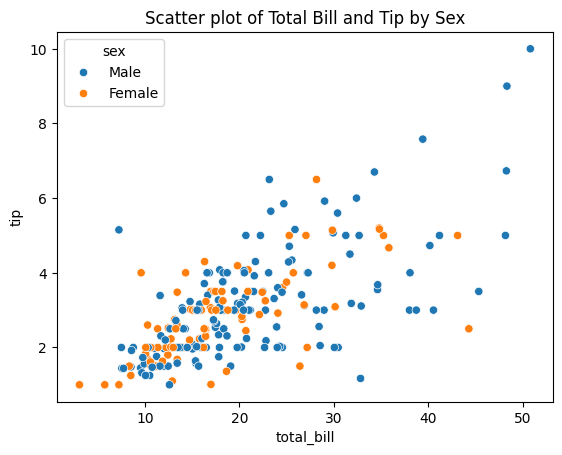

In [42]:
# scatter plot between two variables (one categorical)
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex").set_title("Scatter plot of Total Bill and Tip by Sex")
plt.show()

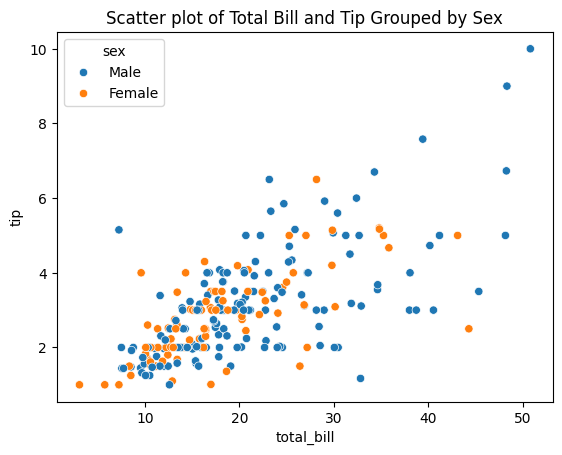

In [43]:
# scatter plot between two variables grouped according to a categorical variable
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex").set_title("Scatter plot of Total Bill and Tip Grouped by Sex")
plt.show()

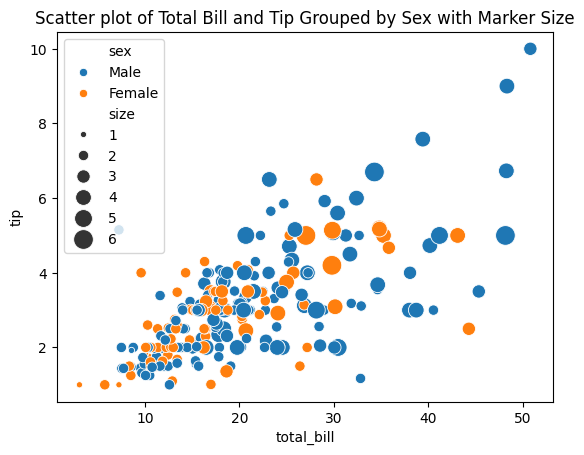

In [44]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers
sns.scatterplot(data=df, x="total_bill", y="tip", hue="sex", size="size", sizes=(20, 200)).set_title("Scatter plot of Total Bill and Tip Grouped by Sex with Marker Size")
plt.show()

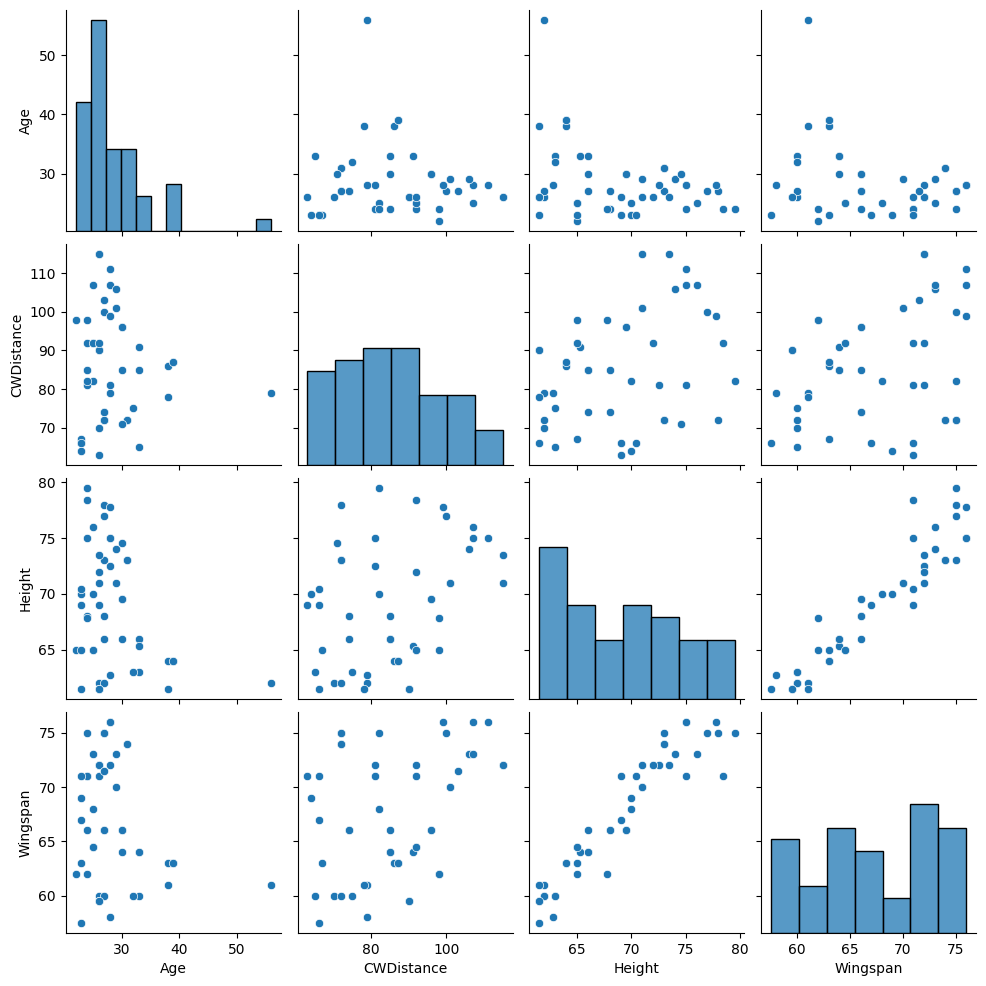

In [47]:
# Pairplot: Scatterplot of "Age","CWDistance","Height",'Wingspan'
df = pd.read_csv(Ruta + url)
sns.pairplot(df[["Age","CWDistance","Height","Wingspan"]])
plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables


In [48]:
# Import fetch library
from sklearn.datasets import fetch_openml

In [49]:
# Import Data Set
iris = fetch_openml(name="iris", version=1, as_frame=True)
df = iris.frame

In [54]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


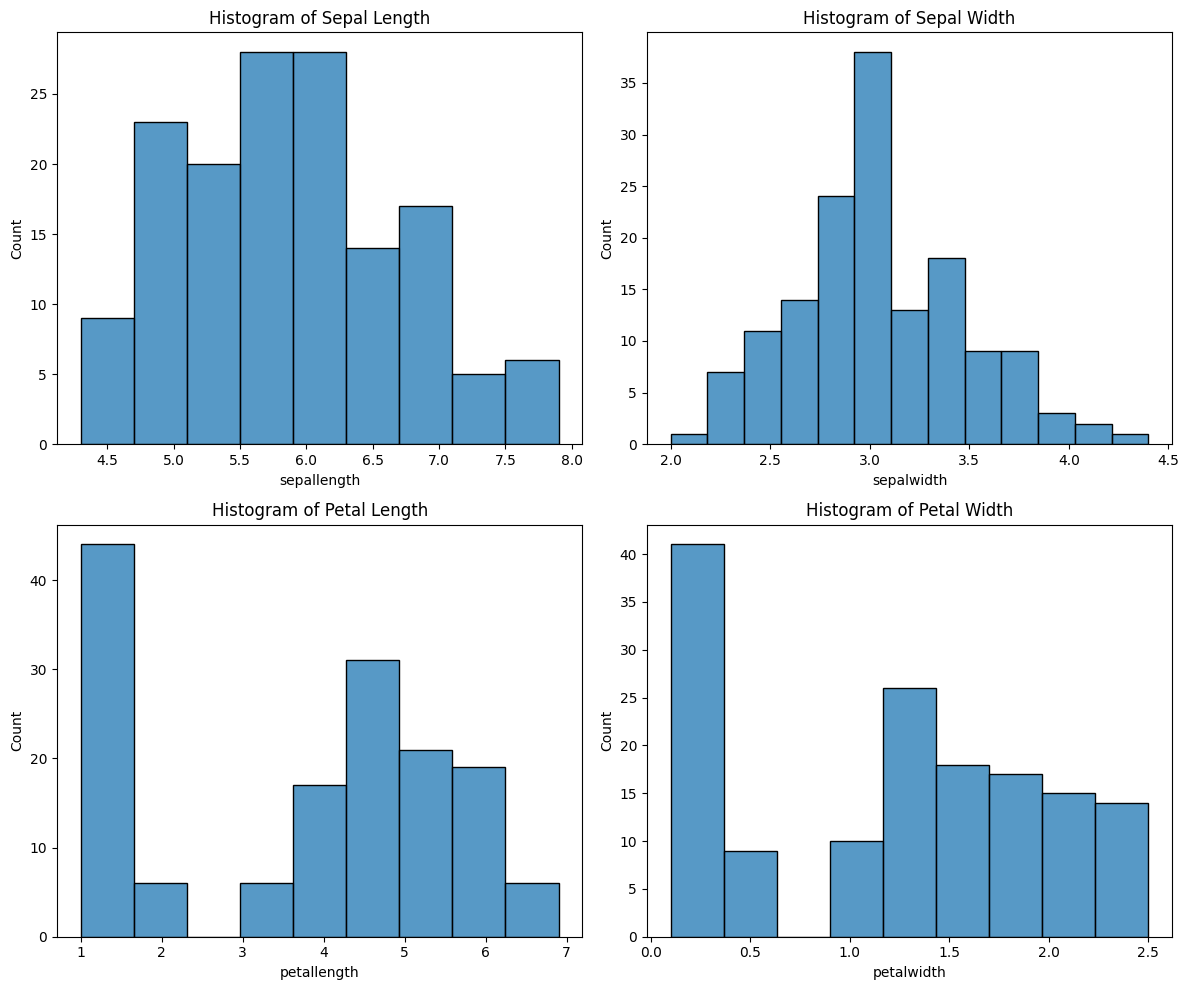

In [53]:
# Plot the histograms for each of the four quantitative variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df["sepallength"], ax=axes[0, 0]).set_title("Histogram of Sepal Length")
sns.histplot(df["sepalwidth"], ax=axes[0, 1]).set_title("Histogram of Sepal Width")
sns.histplot(df["petallength"], ax=axes[1, 0]).set_title("Histogram of Petal Length")
sns.histplot(df["petalwidth"], ax=axes[1, 1]).set_title("Histogram of Petal Width")

plt.tight_layout()
plt.show()

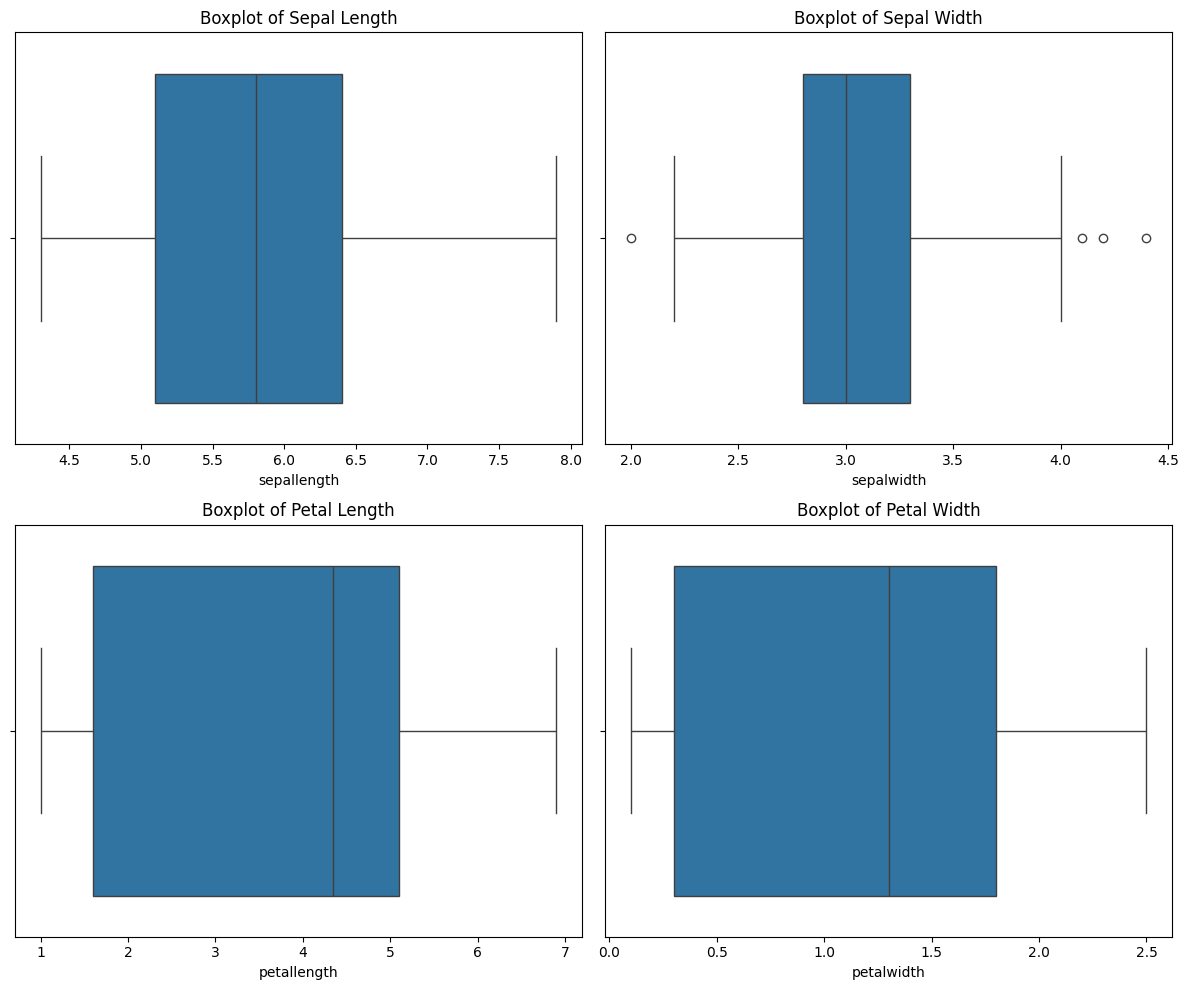

In [56]:
# Plot the boxplots for each of the quantitative variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x=df["sepallength"], ax=axes[0, 0]).set_title("Boxplot of Sepal Length")
sns.boxplot(x=df["sepalwidth"], ax=axes[0, 1]).set_title("Boxplot of Sepal Width")
sns.boxplot(x=df["petallength"], ax=axes[1, 0]).set_title("Boxplot of Petal Length")
sns.boxplot(x=df["petalwidth"], ax=axes[1, 1]).set_title("Boxplot of Petal Width")

plt.tight_layout()
plt.show()

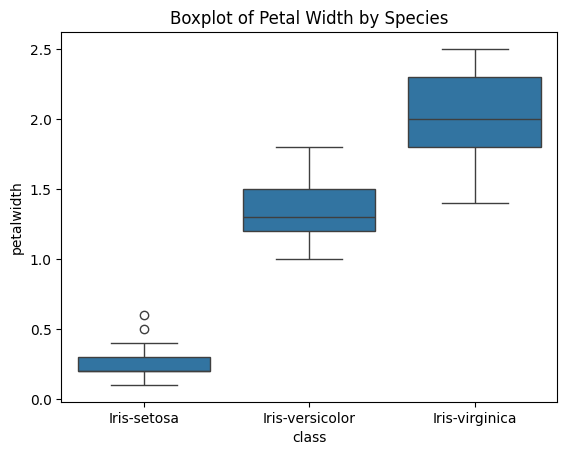

In [57]:
# Plot the boxplots of the petal width grouped by type of flower
sns.boxplot(data=df, x="class", y="petalwidth").set_title("Boxplot of Petal Width by Species")
plt.show()

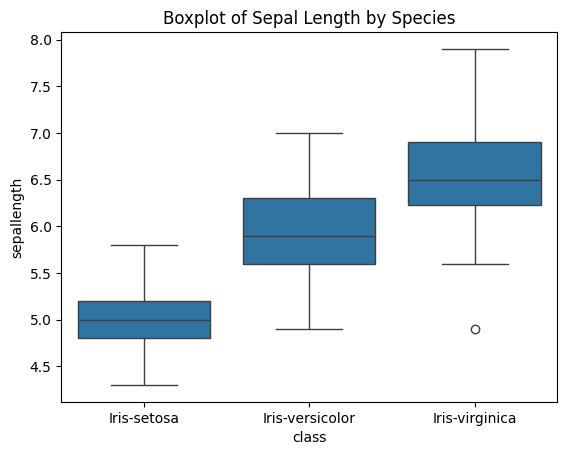

In [58]:
# Plot the boxplots of the setal length grouped by type of flower
sns.boxplot(data=df, x="class", y="sepallength").set_title("Boxplot of Sepal Length by Species")
plt.show()

In [ ]:
# Provide a description (explaination from your observations) of each of the quantitative variables

# Sepal Length: Tiene una media de 5.84 cm y una desviación estándar de 0.83 cm. La distribución de los valores es aproximadamente normal, aunque presenta una ligera asimetría hacia la derecha.
# Sepal Width: Tiene una media de 3.05 cm y una desviación estándar de 0.43 cm. La distribución es aproximadamente normal, lo que indica que los valores están distribuidos de manera simétrica en torno a la media.
# Petal Length: Tiene una media de 3.76 cm y una desviación estándar de 1.76 cm. La distribución de esta variable es bimodal, es decir, presenta dos picos, uno cerca de 1.5 cm y otro alrededor de 5.0 cm. Esto sugiere que hay dos grupos diferentes de longitudes de pétalos en el conjunto de datos.
# Petal Width: Tiene una media de 1.20 cm y una desviación estándar de 0.76 cm. Al igual que la longitud del pétalo, la distribución de la anchura también es bimodal, con dos picos, uno cerca de 0.25 cm y otro alrededor de 1.75 cm.